Question Two

In [2]:
import pandas as pd
import numpy as np

- importing the dataset.

In [15]:
Wolf_Hormones_Dataset = pd.read_excel('Wolf_Hormones.xlsx')

In [16]:
Wolf_Hormones_Dataset

,Individual,Sex,Population,Colour,Cpgmg,Tpgmg,Ppgmg
0,1,M,2,W,15.86,5.32,NaN
1,2,F,1,D,20.02,3.71,14.37622
2,3,F,2,W,9.95,5.30,21.65902
3,4,F,1,D,25.22,3.71,13.42507
4,5,M,2,D,21.13,5.34,NaN
...,...,...,...,...,...,...,...
173,174,U,3,G,73.19,6.41,NaN
174,175,U,3,G,37.05,4.75,NaN
175,176,U,3,G,16.45,7.29,NaN
176,177,U,3,G,43.81,6.09,NaN


In [17]:
Wolf_Hormones_Dataset.dtypes

Individual      int64
Sex            object
Population      int64
Colour         object
Cpgmg         float64
Tpgmg         float64
Ppgmg         float64
dtype: object

In [18]:
Wolf_Hormones_Dataset.isnull().sum()

Individual      0
Sex             0
Population      0
Colour          0
Cpgmg           0
Tpgmg           0
Ppgmg         109
dtype: int64

<AxesSubplot: >

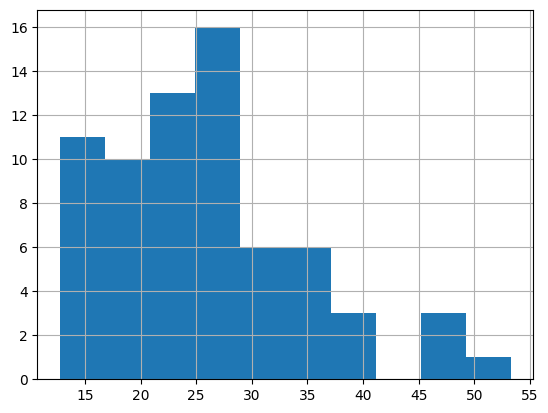

In [19]:
Wolf_Hormones_Dataset['Ppgmg'].hist()

In [20]:
# since the data is not normally distributed, we will use the median to fill the missing values
Wolf_Hormones_Dataset['Ppgmg'].fillna(Wolf_Hormones_Dataset['Ppgmg'].median(), inplace=True)


In [21]:
Wolf_Hormones_Dataset.isnull().sum()

Individual    0
Sex           0
Population    0
Colour        0
Cpgmg         0
Tpgmg         0
Ppgmg         0
dtype: int64

- changing the categorical data into numerical data.


In [22]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Wolf_Hormones_Dataset['Sex'] = le.fit_transform(Wolf_Hormones_Dataset['Sex'])
Wolf_Hormones_Dataset['Colour'] = le.fit_transform(Wolf_Hormones_Dataset['Colour'])

In [23]:
Wolf_Hormones_Dataset.head(10)

,Individual,Sex,Population,Colour,Cpgmg,Tpgmg,Ppgmg
0,1,1,2,2,15.86,5.32,25.000370
1,2,0,1,0,20.02,3.71,14.376220
2,3,0,2,2,9.95,5.30,21.659020
3,4,0,1,0,25.22,3.71,13.425070
4,5,1,2,0,21.13,5.34,25.000370
5,6,1,2,2,12.48,4.60,25.000370
6,7,1,1,2,26.78,4.58,25.000370
7,8,1,1,0,15.41,9.27,25.000370
8,9,0,1,0,33.87,4.81,19.912695
9,10,0,2,2,17.29,5.07,34.598060


In [24]:
Wolf_Hormones_Dataset =  Wolf_Hormones_Dataset.drop( columns=['Individual'])

- Question 1

In [25]:
Wolf_Hormones_Dataset1 = Wolf_Hormones_Dataset.drop( columns=['Ppgmg'])
Wolf_Hormones_Dataset1.head(10)

,Sex,Population,Colour,Cpgmg,Tpgmg
0,1,2,2,15.86,5.32
1,0,1,0,20.02,3.71
2,0,2,2,9.95,5.30
3,0,1,0,25.22,3.71
4,1,2,0,21.13,5.34
5,1,2,2,12.48,4.60
6,1,1,2,26.78,4.58
7,1,1,0,15.41,9.27
8,0,1,0,33.87,4.81
9,0,2,2,17.29,5.07


In [26]:
# checking for the features that are correlated with the target variable
def FunctionAnova(Data, TargetVariable, CategoricalPredictorList):
    from scipy.stats import f_oneway
    SelectedPredictors=[]
    
    print('##### ANOVA Results ##### \n')
    for predictor in CategoricalPredictorList:
        CategoryGroupLists=Data.groupby(predictor)[TargetVariable].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
    
    return(SelectedPredictors)

In [27]:
Predictors = ['Sex','Colour','Population']
FunctionAnova(Wolf_Hormones_Dataset1, 'Tpgmg', Predictors)


##### ANOVA Results ##### 

Sex is correlated with Tpgmg | P-Value: 0.003220433767573283
Colour is correlated with Tpgmg | P-Value: 0.006950848327639451
Population is correlated with Tpgmg | P-Value: 0.005317645496574097


['Sex', 'Colour', 'Population']

In [29]:
#Checking for correlation between the continuous variables and the target variable
ContinuousCols2=['Cpgmg','Tpgmg']
CorrelationData=Wolf_Hormones_Dataset1[ContinuousCols2].corr()
CorrelationData

,Cpgmg,Tpgmg
Cpgmg,1.000000,0.351019
Tpgmg,0.351019,1.000000


-  it is a postive correlation.

- Using a linear regression model to make the prediction.

In [30]:
from sklearn.model_selection import train_test_split

X = Wolf_Hormones_Dataset1.drop(columns=['Tpgmg'])
y = Wolf_Hormones_Dataset1['Tpgmg']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(142, 4)
(36, 4)
(142,)
(36,)


In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('R^2:', model.score(X, y))
print('Adjusted R^2:', 1 - (1-model.score(X, y))*(len(y)-1)/(len(y)-X.shape[1]-1))
print('Mean Square Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

R^2: 0.15370947884031305
Adjusted R^2: 0.13414206794644745
Mean Square Error: 7.929468750639289
Root Mean Square Error: 2.8159312403962016


Re trying using the KNN model.


The optimal number of neighbors is 37.


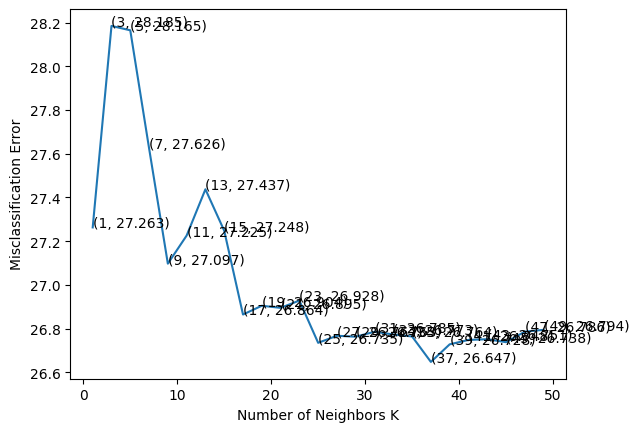

In [33]:
# using the KNN algorithm to predict the target variable
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

# creating a list of K for KNN
myList = list(range(0,50))

# subsetting just the odd ones
neighbors = list(filter(lambda x: x % 2 != 0, myList))

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsRegressor(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='neg_mean_squared_error')
    cv_scores.append(scores.mean())

# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print('\nThe optimal number of neighbors is %d.' % optimal_k)

# plot misclassification error vs k
plt.plot(neighbors, MSE)

for xy in zip(neighbors, np.round(MSE,3)):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')

plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()


In [34]:
# making the model with the optimal k
knn_optimal = KNeighborsRegressor(n_neighbors=optimal_k)

# fitting the model
knn_optimal.fit(X_train, y_train)

# predict the response
pred = knn_optimal.predict(X_test)

# evaluate accuracy
print('R^2:', knn_optimal.score(X, y))
print('Adjusted R^2:', 1 - (1-knn_optimal.score(X, y))*(len(y)-1)/(len(y)-X.shape[1]-1))
print('Mean Square Error:', mean_squared_error(y_test, pred))
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test, pred)))


R^2: 0.05987617714553739
Adjusted R^2: 0.03813921014312205
Mean Square Error: 8.17955856870384
Root Mean Square Error: 2.8599927567572334


Since the K Nearest Neighbors model is giving a low R^2 value, I am using the linear regression model to make the prediction.

In [38]:
# Saving the model
import pickle
import os
with open('C:/Users/hp/Desktop/Allan/Repeat Assignment 3/Repeat Assignment 3/Question2/Model.pkl', 'wb') as file:
    pickle.dump(model, file)
    file.close()
print('pickle file of Predictive Model is saved at Location:',os.getcwd())

pickle file of Predictive Model is saved at Location: c:\Users\hp\Desktop\Allan\Repeat Assignment 3\Repeat Assignment 3\Question2


In [40]:
# loading the model
def load_model():
    with open('C:/Users/hp/Desktop/Allan/Repeat Assignment 3/Repeat Assignment 3/Question2/Model.pkl', 'rb') as file:
        model = pickle.load(file)
        file.close()
    return model

In [45]:
# load the test dataset
test_data = pd.read_excel('Test_Data1.xlsx')
test_data.head(10)

,Individual,Sex,Population,Colour,Cpgmg,Tpgmg
0,179,M,2,W,15.86,NaN
1,180,F,1,D,20.02,NaN
2,181,F,2,W,9.95,NaN
3,182,F,1,D,25.22,NaN
4,183,M,2,D,21.13,NaN
5,184,M,2,W,12.48,NaN
6,185,U,3,G,14.17,NaN
7,186,U,3,G,12.09,NaN
8,187,U,3,G,54.47,NaN
9,188,U,3,G,10.40,NaN


In [46]:
test_data = test_data.drop( columns=['Individual','Tpgmg'])

In [47]:
test_data.isnull().sum()

Sex           0
Population    0
Colour        0
Cpgmg         0
dtype: int64

In [50]:
test_data['Sex'] = le.fit_transform(test_data['Sex'])
test_data['Colour'] = le.fit_transform(test_data['Colour'])

In [48]:
def FunctionPredict(InputData):
    new_model = load_model()
    prediction = new_model.predict(InputData)
    return(prediction)

In [52]:
print('The Predicted Tpgmg is:\n', FunctionPredict(test_data))

The Predicted Tpgmg is:
 [ 5.76416315  5.62012134  3.88514584  6.46805374  7.48826358  5.21300709
  7.60810318  7.26893021 14.17957933  6.99335218 13.50123341 10.79926418
  7.70431089  4.35638209  5.68749845  3.84384046  5.54674257  3.53728028]


- Question 2    


In [53]:
# checking for correlation between the categorical variables and the target variable
FunctionAnova(Wolf_Hormones_Dataset, 'Tpgmg', Predictors)

##### ANOVA Results ##### 

Sex is correlated with Tpgmg | P-Value: 0.003220433767573283
Colour is correlated with Tpgmg | P-Value: 0.006950848327639451
Population is correlated with Tpgmg | P-Value: 0.005317645496574097


['Sex', 'Colour', 'Population']

In [54]:
# checking for the correlation between the continuous variables and the target variable
ContinuousCols=['Cpgmg','Tpgmg','Ppgmg']
CorrelationData=Wolf_Hormones_Dataset[ContinuousCols].corr()
CorrelationData

,Cpgmg,Tpgmg,Ppgmg
Cpgmg,1.000000,0.351019,0.159843
Tpgmg,0.351019,1.000000,0.057477
Ppgmg,0.159843,0.057477,1.000000


In [55]:
X1 = Wolf_Hormones_Dataset.drop(columns=['Ppgmg'])
y1 = Wolf_Hormones_Dataset['Ppgmg']

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=0)
print(X_train1.shape)
print(X_test1.shape)
print(y_train1.shape)
print(y_test1.shape)

(142, 5)
(36, 5)
(142,)
(36,)


In [56]:
# Bulding a LinearRegression model
model1 = LinearRegression()
model1.fit(X_train1, y_train1)
y_pred1 = model1.predict(X_test1)
print('R^2:', model1.score(X1, y1))
print('Adjusted R^2:', 1 - (1-model1.score(X1, y1))*(len(y1)-1)/(len(y1)-X1.shape[1]-1))
print('Mean Square Error:', mean_squared_error(y_test1, y_pred1))
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test1, y_pred1)))


R^2: 0.08069570504590429
Adjusted R^2: 0.05397174298328522
Mean Square Error: 25.682926386978963
Root Mean Square Error: 5.067832513706325



The optimal number of neighbors is 47.


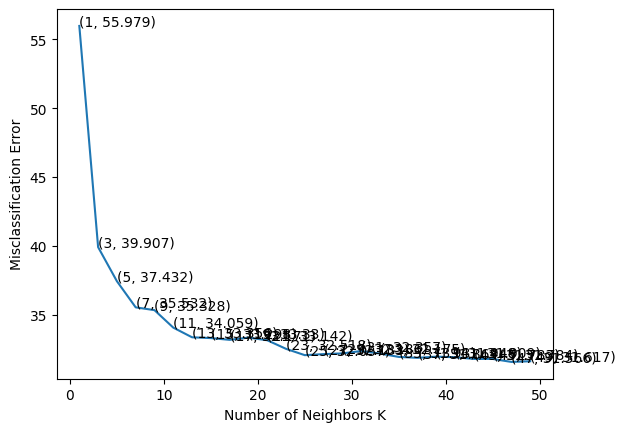

In [58]:

# creating a list of K for KNN
myList = list(range(0,50))

# subsetting just the odd ones
neighbors = list(filter(lambda x: x % 2 != 0, myList))

# empty list that will hold cv scores
cv_scores = []
for k in neighbors:
    knn = KNeighborsRegressor(n_neighbors=k)
    scores = cross_val_score(knn, X1, y1, cv=10, scoring='neg_mean_squared_error')
    cv_scores.append(scores.mean())

# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print('\nThe optimal number of neighbors is %d.' % optimal_k)

# plot misclassification error vs k
plt.plot(neighbors, MSE)

for xy in zip(neighbors, np.round(MSE,3)):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')

plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [62]:
# making the model with the optimal k
knn_optimal = KNeighborsRegressor(n_neighbors=optimal_k)

# fitting the model
knn_optimal.fit(X_train1, y_train1)

# predict the response
pred1 = knn_optimal.predict(X_test1)

# evaluate accuracy
print('R^2:', knn_optimal.score(X1, y1))
print('Adjusted R^2:', 1 - (1-knn_optimal.score(X1, y1))*(len(y1)-1)/(len(y1)-X1.shape[1]-1))
print('Mean Square Error:', mean_squared_error(y_test1, pred1))
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test1, pred1)))


R^2: 0.06847251000726362
Adjusted R^2: 0.04139322250747479
Mean Square Error: 24.39164380088001
Root Mean Square Error: 4.938789710129397


The same issues arises here as well. The KNN model is giving a low R^2 value. So I am using the linear regression model to make the prediction.

In [63]:
# saving the model
import pickle
import os
with open('C:/Users/hp/Desktop/Allan/Repeat Assignment 3/Repeat Assignment 3/Question2/Model1.pkl', 'wb') as file:
    pickle.dump(model1, file)
    file.close()
print('pickle file of Predictive Model is saved at Location:',os.getcwd())


pickle file of Predictive Model is saved at Location: c:\Users\hp\Desktop\Allan\Repeat Assignment 3\Repeat Assignment 3\Question2


In [64]:
# Loading the model
def load_model1():
    with open('C:/Users/hp/Desktop/Allan/Repeat Assignment 3/Repeat Assignment 3/Question2/Model1.pkl', 'rb') as file:
        model1 = pickle.load(file)
        file.close()
    return model1

In [73]:
def FunctionPredict1(InputData):
    new_model1 = load_model1()
    prediction = new_model1.predict(InputData)
    return(prediction)

In [69]:
# load the test dataset
test_data2 = pd.read_excel('Test_Data2.xlsx')
test_data2.head(10)

,Individual,Sex,Population,Colour,Cpgmg,Tpgmg,Ppgmg
0,197,F,1,D,22.87,3.81,NaN
1,198,F,2,W,17.29,5.07,NaN
2,199,F,1,W,9.43,4.47,NaN
3,200,F,1,W,8.84,3.75,NaN
4,201,F,1,D,32.00,4.56,NaN
5,202,F,1,D,14.30,6.06,NaN
6,203,F,2,W,10.16,2.34,NaN
7,204,F,2,W,17.05,4.34,NaN
8,205,F,2,D,13.91,4.72,NaN
9,206,F,2,D,17.16,9.25,NaN


In [68]:
test_data2.isnull().sum()

Individual     0
Sex            0
Population     0
Colour         0
Cpgmg          0
Tpgmg          0
Ppgmg         12
dtype: int64

In [70]:
test_data2['Sex'] = le.fit_transform(test_data2['Sex'])
test_data2['Colour'] = le.fit_transform(test_data2['Colour'])

In [71]:
test_data2.drop(columns=['Individual','Ppgmg'], inplace=True)

In [76]:
print('The values of Ppgmg are :\n',FunctionPredict1(test_data2))

The values of Ppgmg are :
 [24.27400801 26.74005429 24.17311455 24.11829859 24.91899071 23.72636902
 26.19441591 26.70920584 25.68580155 25.99878422 24.17128427 27.23774547]
